# Infinite Row of Vortices

In [49]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [98]:
N = 20                                     # Number of points in each direction
x_start, x_end = -2.0, 2.0                  # x-boundaries
y_start, y_end = -1.0, 1.0                  # y-boundaries
x = numpy.linspace(x_start, x_end, N)       # 1D numpy array
y = numpy.linspace(y_start, y_end, N)       # 1D numpy array
X, Y = numpy.meshgrid(x, y)                 # 2D numpy mesh grid

In [147]:
gamma = 5.0                                                # vortex strengths
x_vortex = numpy.linspace(-10, 10, 50)                     # vortex locations
y_vortex = numpy.zeros(len(x_vortex))

In [148]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex
    
    Parameters
    ----------
    strength: float
        strength of the vortex
    xv: float
        x-coordinate of the vortex
    yv: float
        y-coordinate of the vortex
    X: 2D numpy array of floats
        x-coordinate of the mesh points
    Y: 2D numpy array of floats
        y-coordinate of the mesh points
        
    Returns
    -------
    u: 2D numpy array of floats
        x-component of the velocity field
    v: 2D numpy array of floats
        y-component of the velocity field
    """
    u = +strength/(2*numpy.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = -strength/(2*numpy.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [149]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream function generated by a vortex
    
    Parameters
    ----------
    strength: float
        strength of the vortex
    xv: float
        x-coordinate of the vortex
    yv: float
        y-coordinate of the vortex
    X: 2D numpy array of floats
        x-coordinate of the mesh points
    Y: 2D numpy array of floats
        y-coordinate of the mesh points
        
    Returns
    -------
    psi: 2D numpy array of floats
        The stream function
    """
    psi = strength/(2*numpy.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [150]:
u_vortex = numpy.zeros_like(X)
v_vortex = numpy.zeros_like(X)
psi_vortex = numpy.zeros_like(X)

# compute velocity for all vortices
for i in range(len(x_vortex)):
    u, v = get_velocity_vortex(gamma, x_vortex[i], y_vortex[i], X, Y)
    psi = get_stream_function_vortex(gamma, x_vortex[i], y_vortex[i], X, Y)
    u_vortex = u + u_vortex
    v_vortex = v + v_vortex
    psi_vortex = psi + psi_vortex

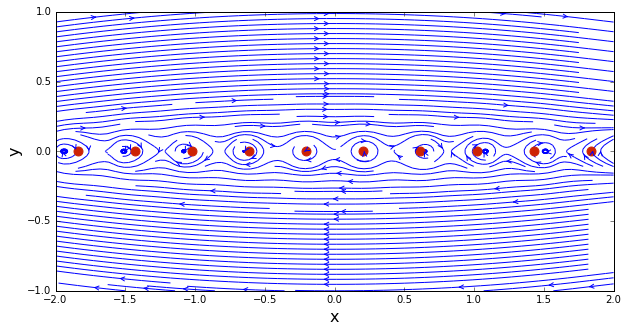

In [151]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vortex, v_vortex, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

# Infinite vortices streamlines

In [152]:
N = 20                                     # Number of points in each direction
x_start, x_end = -2.0, 2.0                  # x-boundaries
y_start, y_end = -1.0, 1.0                  # y-boundaries
x = numpy.linspace(x_start, x_end, N)       # 1D numpy array
y = numpy.linspace(y_start, y_end, N)       # 1D numpy array
X, Y = numpy.meshgrid(x, y)                 # 2D numpy mesh grid

In [158]:
gamma = 5.0                                                # vortex strengths
x_vortex = numpy.linspace(-10, 10, 500)                     # vortex locations
y_vortex = numpy.zeros(len(x_vortex))

In [167]:
# define distance, a, between vortices
a = 0.01

In [168]:
# Define function for velocity components of infinite row of vortices
def get_velocity_inf_vort(strength, xv, yv, a, X, Y):
    """
    Returns the velocity field generated by vortices
    
    Parameters
    ----------
    strength: float
        strength of the vortex
    xv: float
        x-coordinate of the vortex
    yv: float
        y-coordinate of the vortex
    a: float
        distance between vortices
    X: 2D numpy array of floats
        x-coordinate of the mesh points
    Y: 2D numpy array of floats
        y-coordinate of the mesh points
    
    Returns
    -------
    u: 2D numpy array of floats
        x-component of the velocity field
    v: 2D numpy array of floats
        y-component of the velocity field
    """
    u = + strength/(2*a)*numpy.sinh(2*numpy.pi*Y/a)/(numpy.cosh(2*numpy.pi*Y/a)-numpy.cos(2*numpy.pi*X/a))
    v = - strength/(2*a)*numpy.sin(2*numpy.pi*X/a)/(numpy.cosh(2*numpy.pi*Y/a)-numpy.cos(2*numpy.pi*X/a))
    
    return u, v

In [169]:
u, v = get_velocity_inf_vort(gamma, x_vortex, y_vortex, a, X, Y)

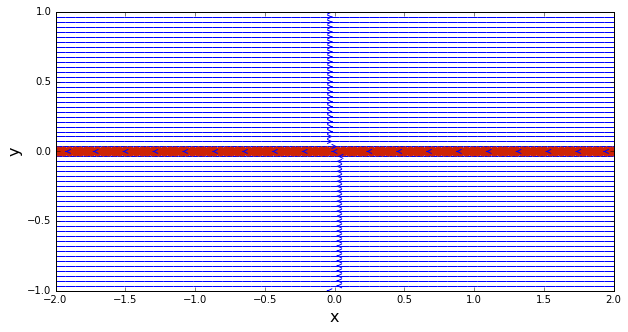

In [170]:
# plot streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');